In [1]:
import pandas as pd

# Data Preprocessing

## Data Scraping

## Final Data Cleaning

In [2]:
dataframe = pd.read_csv(r'/home/utilisateur/Téléchargements/EDA.csv')

# EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
dataframe.columns

Index(['id_allocine', 'title', 'release_year', 'original_title', 'genres',
       'duration_m', 'synopsis', 'poster_link', 'release_date', 'societies',
       'budget', 'nationality', 'directors', 'all_director_oscars',
       'all_actor_oscars', 'actor_celebs', 'actor_celebs_by_year',
       'entries_mean_actor', 'entries_sum_actor', 'entries_mean_director',
       'entries_sum_director', 'entries_mean_composer', 'entries_sum_composer',
       'jpbox_copies', 'entries'],
      dtype='object')

## Univariate Analysis

#### id_allocine 🗑

In [5]:
dataframe.id_allocine.describe()

count      3789.000000
mean     158853.259699
std       88606.058067
min        5818.000000
25%       58275.000000
50%      173048.000000
75%      236733.000000
max      325052.000000
Name: id_allocine, dtype: float64

In [6]:
print(f"Il y a {dataframe.id_allocine.isna().sum()} valeurs manquantes")

Il y a 0 valeurs manquantes


In [7]:
# Conversion de la variable en INTEGER
dataframe['id_allocine'] = dataframe['id_allocine'].astype(int)

#### title

In [8]:
dataframe.title.describe()

count        3789
unique       3771
top       Barbara
freq            2
Name: title, dtype: object

In [9]:
print(f"Il y a {dataframe.title.isna().sum()} valeurs manquantes")

Il y a 0 valeurs manquantes


#### release_year

In [10]:
dataframe.release_year.describe()

count    3789.000000
mean     2011.823964
std         6.742973
min      1968.000000
25%      2006.000000
50%      2012.000000
75%      2017.000000
max      2024.000000
Name: release_year, dtype: float64

In [11]:
print(f"Il y a {dataframe.release_year.isna().sum()} valeurs manquantes")

Il y a 0 valeurs manquantes


In [12]:
# Conversion de la variable en INTEGER
dataframe['release_year'] = dataframe['release_year'].astype(int)

#### original_title 🗑

In [13]:
# Variable entièrement vide, à supprimer !

In [14]:
dataframe.original_title.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: original_title, dtype: float64

In [15]:
dataframe.original_title.value_counts()

Series([], Name: count, dtype: int64)

#### genres

In [16]:
dataframe.genres.describe()

count        3789
unique        400
top       Comédie
freq          605
Name: genres, dtype: object

In [17]:
# Utilisation de la méthode explode pour séparer les genres
dataframe = dataframe.assign(genre=dataframe['genres'].str.split(',')).explode('genre')
dataframe.reset_index(drop=True, inplace=True)
dataframe.sample(1)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,...,actor_celebs_by_year,entries_mean_actor,entries_sum_actor,entries_mean_director,entries_sum_director,entries_mean_composer,entries_sum_composer,jpbox_copies,entries,genre
775,37643,Juste un baiser,2002,NaN,"Drame,Romance,Comédie",115,"Carlo a trente ans. Sa compagne, la belle Giul...",https://fr.web.img6.acsta.net/c_310_420/medias...,2002-11-06,Gaumont Buena Vista International (GBVI)|Medus...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0,110315,Romance


In [18]:
dataframe.genre.describe()

count        7343
unique         27
top       Comédie
freq         1384
Name: genre, dtype: object

In [19]:
dataframe.genre.value_counts()

genre
Comédie               1384
Drame                 1084
Action                 683
Thriller               657
Aventure               533
Romance                396
Fantastique            354
Animation              329
Policier               281
Famille                273
Science Fiction        260
Epouvante-horreur      242
Comédie dramatique     229
Biopic                 154
Historique             135
Guerre                  64
Espionnage              64
Musical                 62
Comédie musicale        36
Documentaire            35
Arts Martiaux           27
Western                 25
Judiciaire              16
Péplum                  10
Erotique                 7
0                        2
Évènement Sportif        1
Name: count, dtype: int64

In [20]:
# Supprimer les deux films avec le genre "0"

In [21]:
# labels = ["Comédie", "Drame", "Action", "Thriller", "Aventure", "Romance", "Fantastique", "Animation", "Policier",
# "Famille", "Science Fiction", "Epouvante-horreur", "Comédie dramatique", "Biopic",
# "Historique", "Guerre", "Espionnage", "Musical", "Comédie musicale", "Documentaire",
# "Arts Martiaux", "Western", "Judiciaire", "Péplum", "Erotique", 0,"Évènement Sportif"]
# plt.figure(figsize=(10,10))
# plt.pie(test.genre.value_counts(), labels=labels, autopct='%1.1f%%')
# plt.show()

/tmp/ipykernel_119989/2953242437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dataframe.genre.value_counts(), palette="mako")


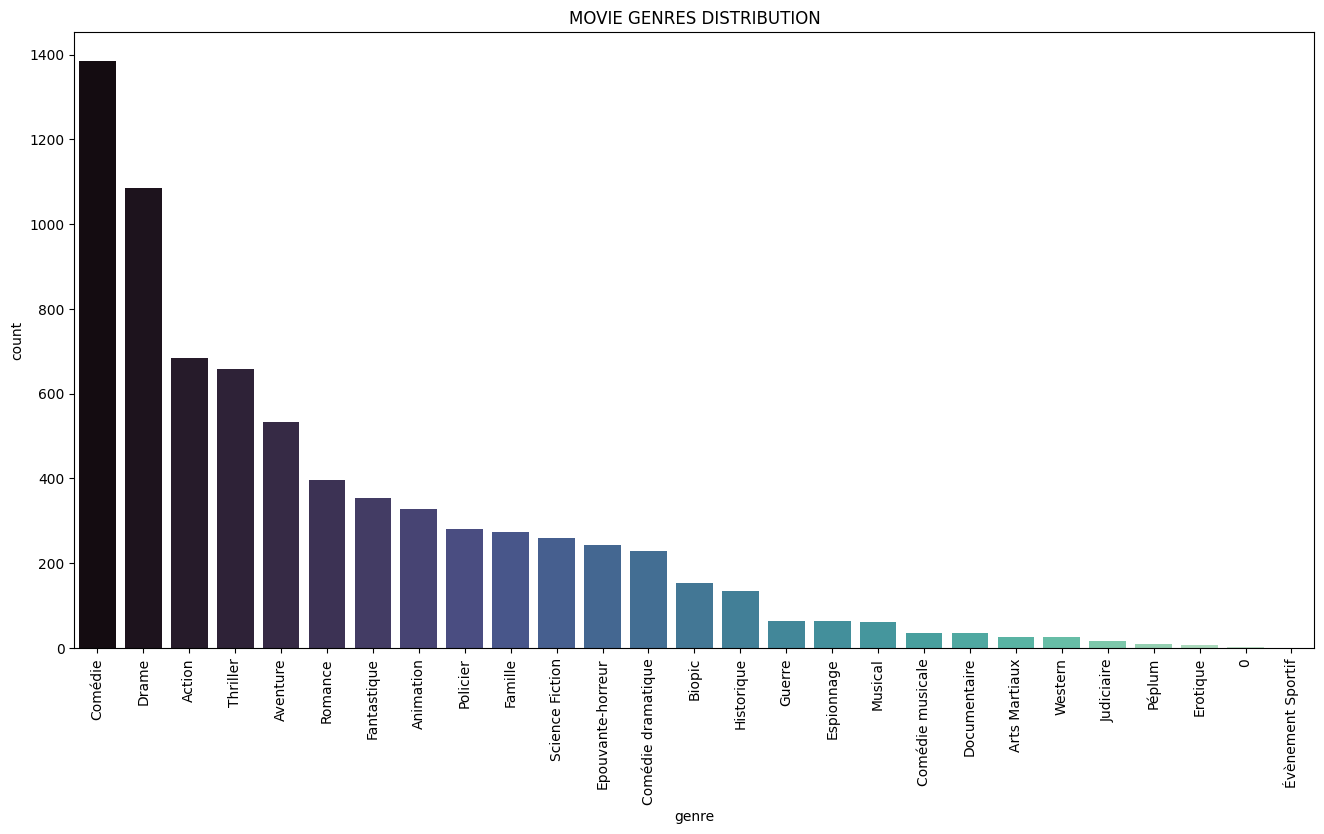

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(dataframe.genre.value_counts(), palette="mako")
plt.title("MOVIE GENRES DISTRIBUTION")
plt.xticks(rotation='vertical')
plt.show()

#### duration_m

In [23]:
dataframe.duration_m.describe()

count    7343.000000
mean      108.561487
std        18.788823
min         0.000000
25%        95.000000
50%       105.000000
75%       119.000000
max       220.000000
Name: duration_m, dtype: float64

In [24]:
print(f"Il y a {dataframe.duration_m.isna().sum()} valeurs manquantes")

Il y a 0 valeurs manquantes


#### synopsis

In [25]:
dataframe.synopsis.describe()

count     7343
unique    3784
top           
freq         7
Name: synopsis, dtype: object

In [26]:
print(f"Il y a {dataframe.synopsis.isna().sum()} valeurs manquantes")

Il y a 0 valeurs manquantes


#### poster_link 🗑

In [27]:
# Feature inutile, à supprimer

#### release_date

In [28]:
dataframe.release_date.describe()

count           7343
unique          1257
top       2002-09-18
freq              16
Name: release_date, dtype: object

In [29]:
print(f"Il y a {dataframe.release_date.isna().sum()} valeurs manquantes")

Il y a 0 valeurs manquantes


#### societies

In [30]:
# Exploser le dataset, dupliquer chaque film en fonction du nombre de sociétés de production qu'il a
# Ensuite faire un describe, isna.sum et un piechart

In [31]:
dataframe.societies.describe()

count                                                  7343
unique                                                 3549
top       Pixar Animation Studios|The Walt Disney Compan...
freq                                                     31
Name: societies, dtype: object

In [32]:
# Utilisation de la méthode explode pour séparer les genres
dataframe = dataframe.assign(production=dataframe['societies'].str.split('|')).explode('production')
dataframe.reset_index(drop=True, inplace=True)
dataframe.sample(1)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,...,entries_mean_actor,entries_sum_actor,entries_mean_director,entries_sum_director,entries_mean_composer,entries_sum_composer,jpbox_copies,entries,genre,production
15420,146628,Battleship,2012,NaN,"Science Fiction,Action,Thriller",130,"Océan Pacifique… Au large d’Hawaï, l’US Navy d...",https://fr.web.img6.acsta.net/c_310_420/medias...,2012-04-11,Stuber Productions|Bluegrass Films|Universal P...,...,817758.0,53154238.0,0.0,0.0,0.0,0.0,602.0,567346,Science Fiction,Film 44


In [33]:
dataframe.production.value_counts().head(20)

production
Warner Bros. France                        650
Metropolitan FilmExport                    609
France 2 Cinéma                            525
StudioCanal                                487
Universal Pictures International France    440
Universal Pictures                         427
Warner Bros.                               416
Twentieth Century Fox France               415
France 3 Cinéma                            401
Pathé                                      398
TF1 Films Production                       394
SND                                        393
The Walt Disney Company France             372
Sony Pictures Releasing France             349
Paramount Pictures                         319
Paramount Pictures France                  317
United International Pictures (UIP)        257
Columbia Pictures                          254
Walt Disney Pictures                       252
20th Century Studios                       248
Name: count, dtype: int64

/tmp/ipykernel_119989/1196694586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dataframe.production.value_counts().head(30), palette="mako")


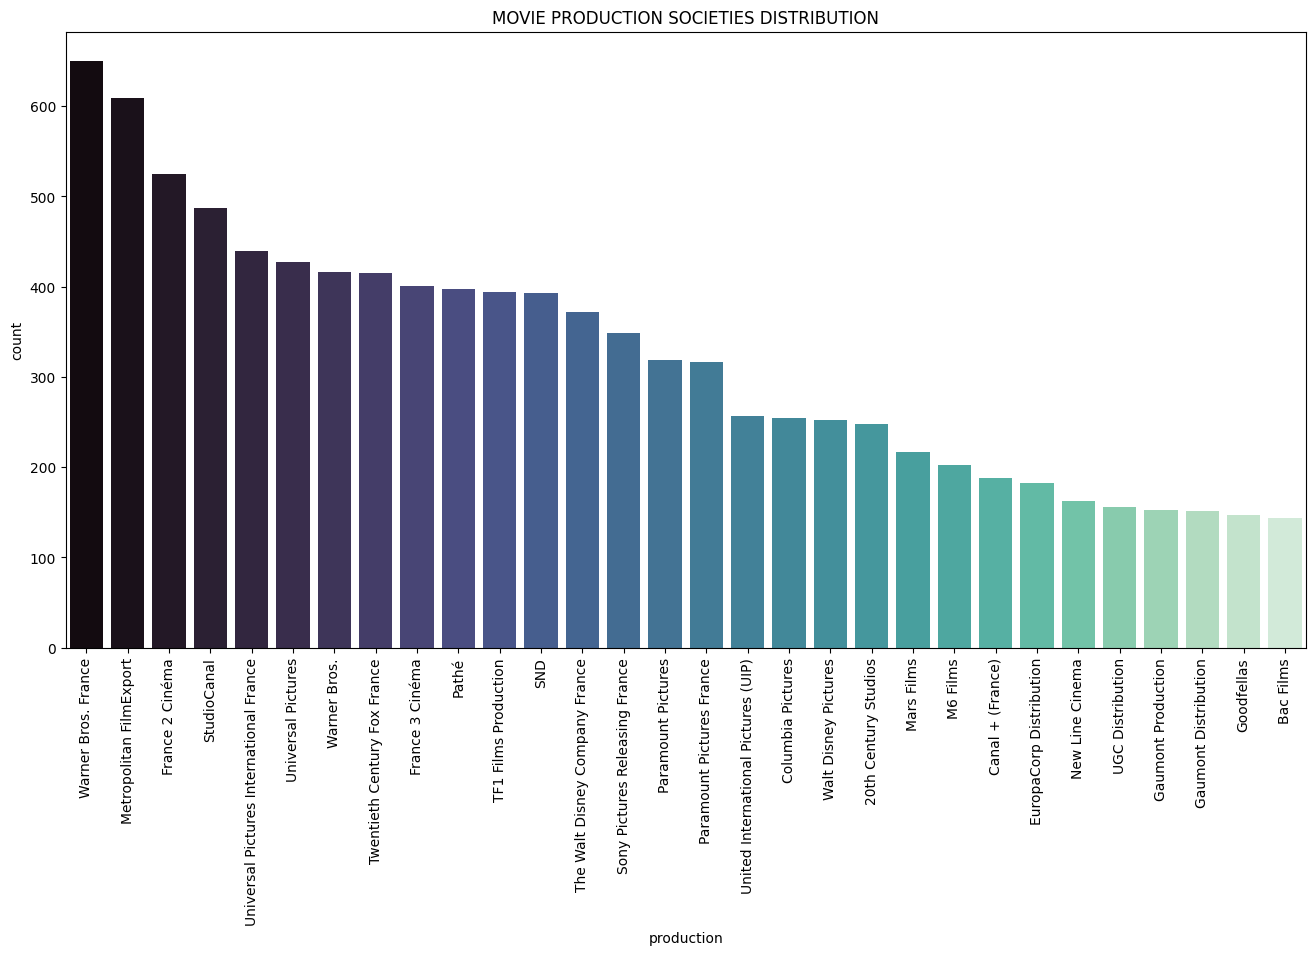

In [34]:
plt.figure(figsize=(16,8))
sns.barplot(dataframe.production.value_counts().head(30), palette="mako")
plt.title("MOVIE PRODUCTION SOCIETIES DISTRIBUTION")
plt.xticks(rotation='vertical')
plt.show()

#### budget 🗑 ou ⚠️

In [35]:
# Catégoriser la variable Budget ou la supprimer
dataframe.budget.describe()

count     32636
unique      767
top           0
freq      15227
Name: budget, dtype: object

#### nationality

In [36]:
# Exploser le dataset, dupliquer chaque film en fonction du nombre de pays d'origine qu'il a
# Ensuite faire un describe, isna.sum et un piechart

In [37]:
dataframe.nationality.describe()

count      32636
unique       369
top       U.S.A.
freq       12845
Name: nationality, dtype: object

In [38]:
print(f"Il y a {dataframe.nationality.isna().sum()} valeurs manquantes")

Il y a 0 valeurs manquantes


In [39]:
# Utilisation de la méthode explode pour séparer les genres
dataframe = dataframe.assign(country=dataframe['nationality'].str.split('|')).explode('country')
dataframe.reset_index(drop=True, inplace=True)
dataframe.sample(1)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,...,entries_sum_actor,entries_mean_director,entries_sum_director,entries_mean_composer,entries_sum_composer,jpbox_copies,entries,genre,production,country
39871,255535,Les Blagues de Toto,2020,NaN,Comédie,84,"A l’école, Toto est bien plus doué pour faire ...",https://fr.web.img4.acsta.net/c_310_420/pictur...,2020-08-05,Frakas Productions|Superprod|RTBF|Bidibul Prod...,...,48038642.0,0.0,0.0,0.0,0.0,545.0,205528,Comédie,Bidibul Productions,France


In [40]:
dataframe.country.value_counts()

country
U.S.A.             18043
France             13442
Grande-Bretagne     3706
Allemagne           2190
Belgique            2159
                   ...  
Cameroun               5
Colombie               4
Monaco                 4
Corée                  3
Egypte                 3
Name: count, Length: 74, dtype: int64

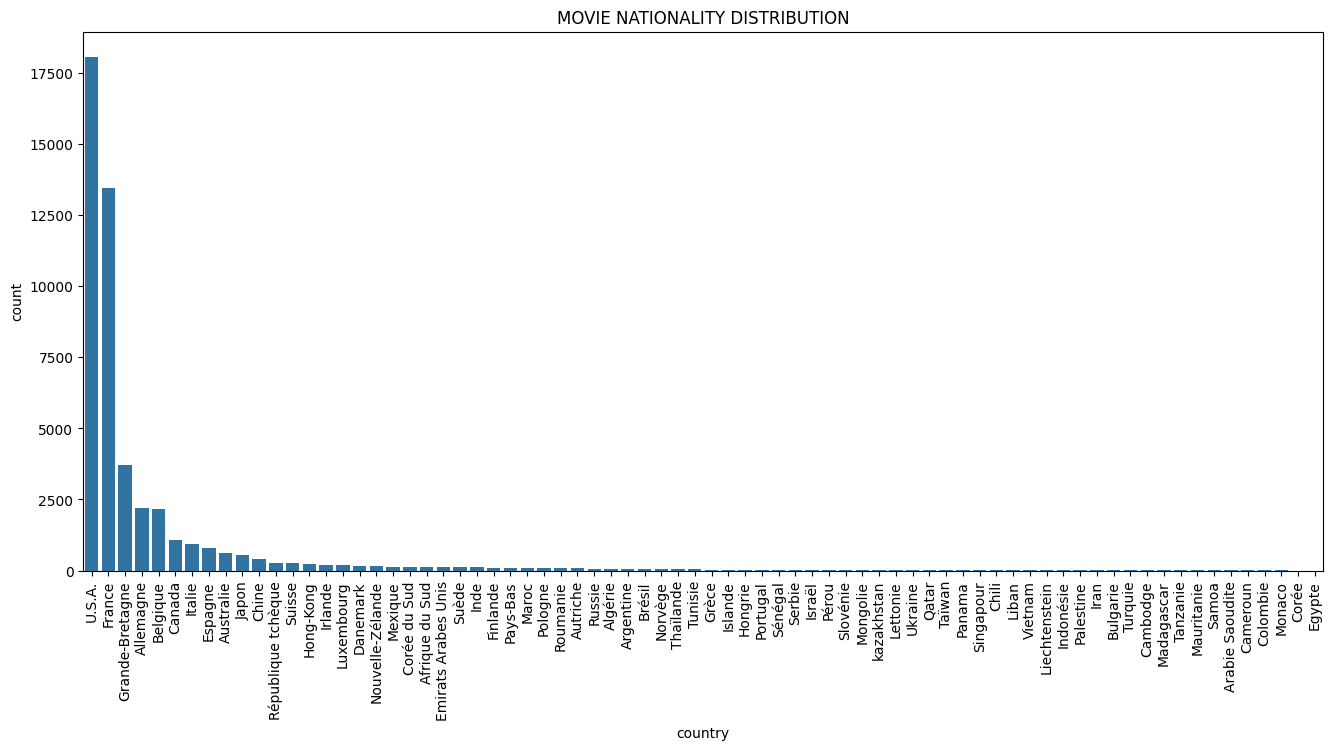

In [41]:
plt.figure(figsize=(16,7))
sns.barplot(dataframe.country.value_counts())
plt.xticks(rotation="vertical")
plt.title('MOVIE NATIONALITY DISTRIBUTION')
plt.show()

#### directors

In [42]:
# Exploser le dataset, dupliquer chaque film en fonction du nombre de réalisateurs qu'il a
# Ensuite faire un describe, isna.sum et un piechart

In [43]:
# Utilisation de la méthode explode pour séparer les genres
dataframe = dataframe.assign(director=dataframe['directors'].str.split('|')).explode('director')
dataframe.reset_index(drop=True, inplace=True)
dataframe.sample(1)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,...,entries_mean_director,entries_sum_director,entries_mean_composer,entries_sum_composer,jpbox_copies,entries,genre,production,country,director
9450,53890,Zig-Zag,2005,NaN,"Aventure,Animation",84,"Perdu par un cirque, un adorable bébé zèbre es...",https://fr.web.img5.acsta.net/c_310_420/medias...,2005-07-27,CTV International|Alcon Entertainment,...,0.0,0.0,0.0,0.0,382.0,73050,Aventure,CTV International,U.S.A.,Frederik Du Chau


In [44]:
dataframe.director.value_counts().head(20)

director
Ken Loach               387
Steven Spielberg        316
Ridley Scott            312
Rachid Bouchareb        298
Paul W.S. Anderson      294
Luc Besson              292
Martin Scorsese         266
Woody Allen             251
Christopher Nolan       218
Tim Burton              210
Patrice Leconte         194
Matthew Vaughn          187
Steven Soderbergh       184
Jérôme Salle            183
Clint Eastwood          182
François Ozon           177
Peter Jackson           172
Tony Scott              171
Jean-François Richet    170
David Cronenberg        169
Name: count, dtype: int64

/tmp/ipykernel_119989/3872081502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dataframe.director.value_counts().head(20), palette="Blues_r")


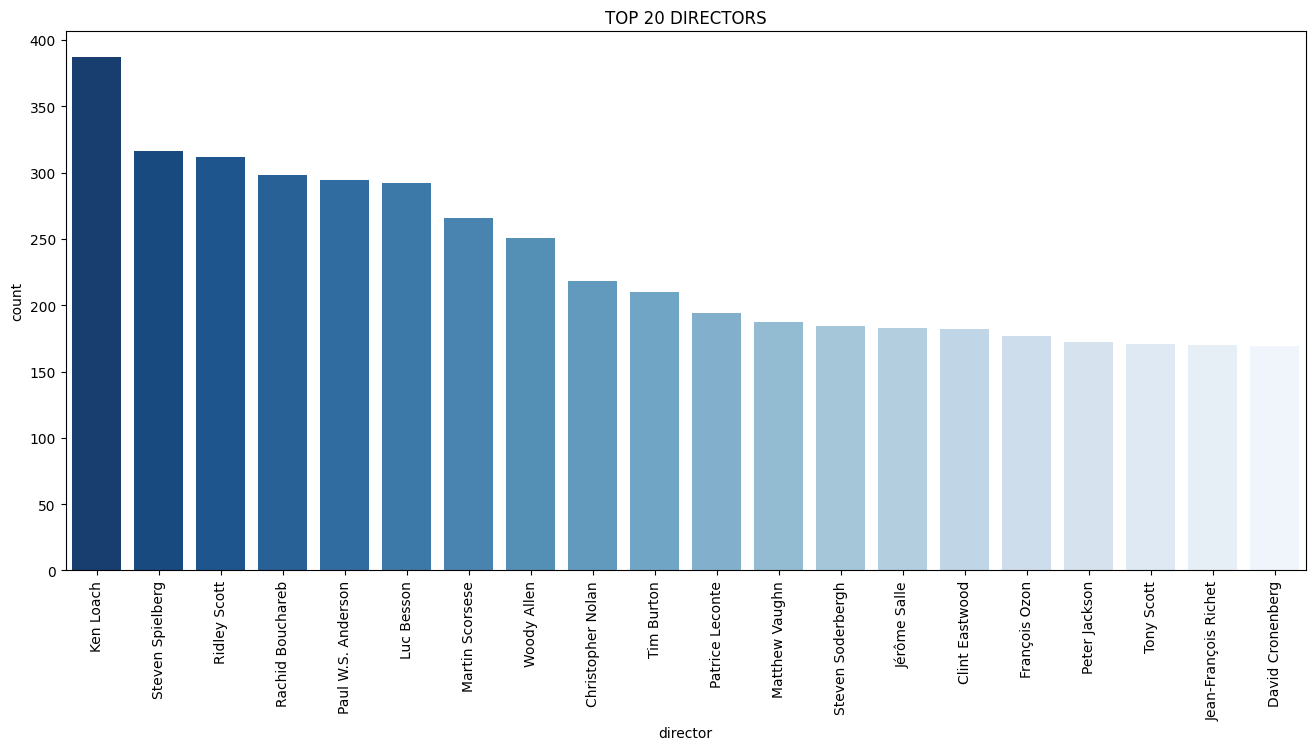

In [45]:
plt.figure(figsize=(16,7))
sns.barplot(dataframe.director.value_counts().head(20), palette="Blues_r")
plt.title("TOP 20 DIRECTORS")
plt.xticks(rotation="vertical")
plt.show()

In [46]:
# Le graphique ci-dessus est biaisé. Spielberg n'a pas réalisé +300 films depuis l'an 2000 (certains films sont en doublons!)

#### all_director_oscars

In [47]:
dataframe.all_director_oscars.describe()

count    177.000000
mean       1.338983
std        0.474707
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: all_director_oscars, dtype: float64

In [48]:
dataframe.all_director_oscars.value_counts()

all_director_oscars
1.0    117
2.0     60
Name: count, dtype: int64

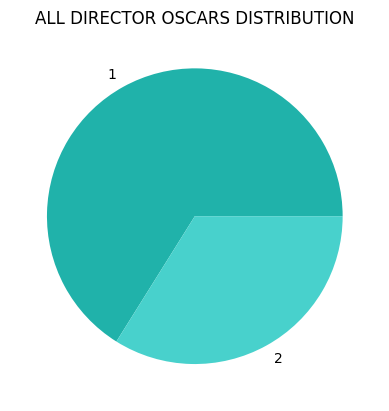

In [49]:
labels = [1, 2]
colors = ["lightseagreen",  "mediumturquoise"]
plt.pie(dataframe.all_director_oscars.value_counts(), labels=labels, colors=colors)
plt.title("ALL DIRECTOR OSCARS DISTRIBUTION")
plt.show()

#### all_actor_oscars

In [50]:
dataframe.all_actor_oscars.describe()

count    7854.000000
mean        1.303922
std         0.604910
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: all_actor_oscars, dtype: float64

In [51]:
dataframe.all_actor_oscars.value_counts()

all_actor_oscars
1.0    5968
2.0    1490
3.0     291
4.0     105
Name: count, dtype: int64

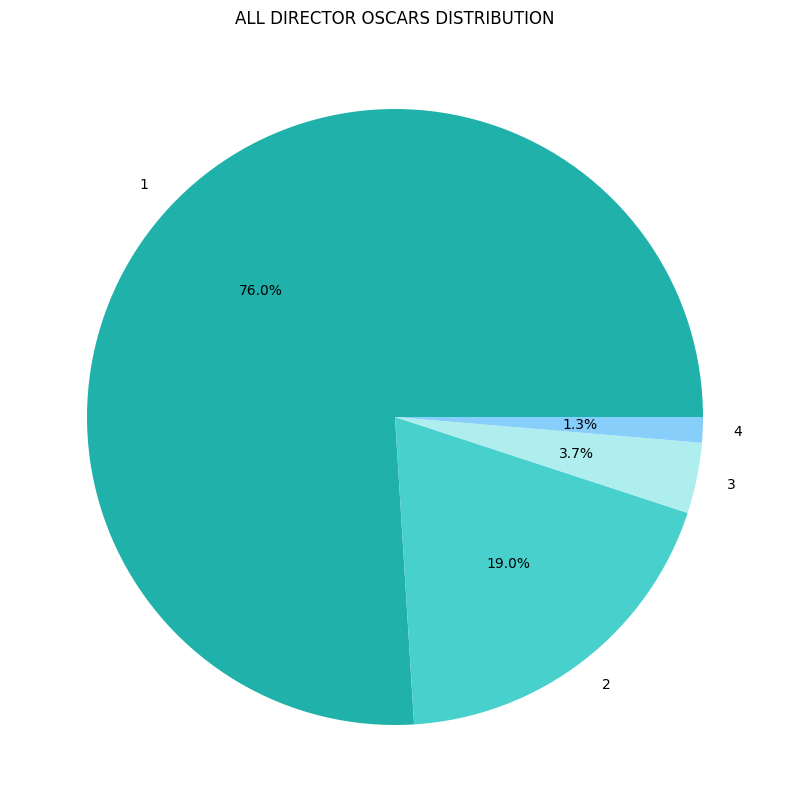

In [52]:
labels = [1, 2, 3, 4]
colors = ["lightseagreen",  "mediumturquoise", "paleturquoise", "lightskyblue"]
plt.figure(figsize=(10,10))
plt.pie(dataframe.all_actor_oscars.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("ALL DIRECTOR OSCARS DISTRIBUTION")
plt.show()

#### actor_celebs ⚠️

In [53]:
dataframe.actor_celebs.describe()

count    6196.000000
mean       47.616043
std        41.342296
min         1.000000
25%        21.000000
50%        36.000000
75%        73.000000
max       409.000000
Name: actor_celebs, dtype: float64

In [54]:
print(f"Il y a {dataframe.actor_celebs.isna().sum()} valeurs manquantes")

Il y a 41347 valeurs manquantes


/tmp/ipykernel_119989/3818966983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dataframe.actor_celebs.value_counts(), palette="Blues_r", legend=False)


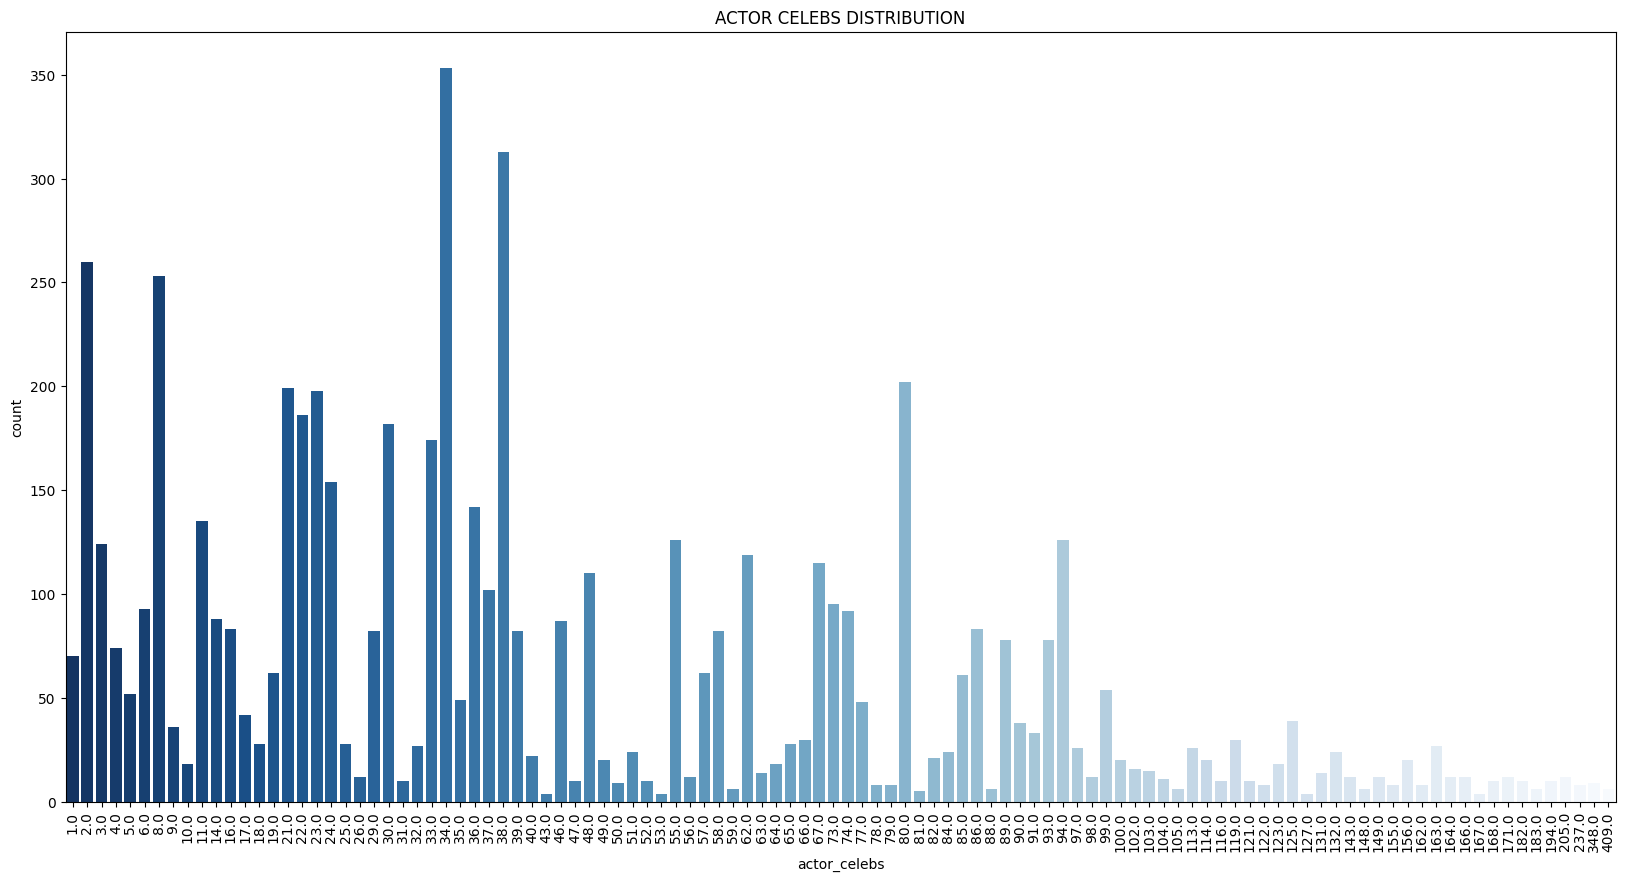

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(dataframe.actor_celebs.value_counts(), palette="Blues_r", legend=False)
plt.title('ACTOR CELEBS DISTRIBUTION')
plt.xticks(rotation='vertical')
plt.show()

#### actor_celebs_by_year ⚠️

In [56]:
dataframe.actor_celebs_by_year.describe()

count    13708.000000
mean        23.572950
std         16.599304
min          1.000000
25%         13.000000
50%         21.000000
75%         29.000000
max        177.000000
Name: actor_celebs_by_year, dtype: float64

In [57]:
print(f"Il y a {dataframe.actor_celebs_by_year.isna().sum()} valeurs nulles")

Il y a 33835 valeurs nulles


#### entries_mean_actor ⚠️

In [58]:
dataframe.entries_mean_actor.describe()

count    3.993800e+04
mean     8.425288e+05
std      3.563096e+05
min      0.000000e+00
25%      6.269080e+05
50%      7.957340e+05
75%      9.943020e+05
max      3.679078e+06
Name: entries_mean_actor, dtype: float64

In [59]:
print(f"Il y a {dataframe.entries_mean_actor.isna().sum()} valeurs nulles")

Il y a 7605 valeurs nulles


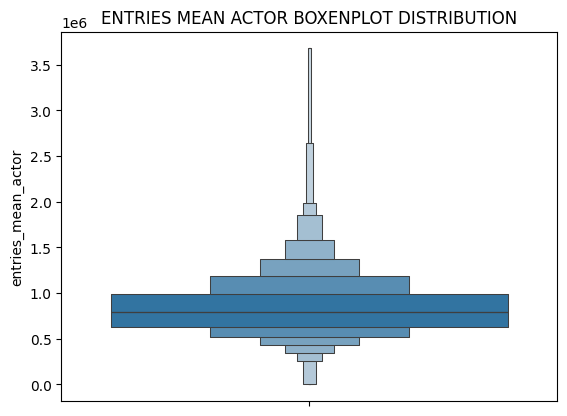

In [60]:
sns.boxenplot(dataframe['entries_mean_actor'])
plt.title("ENTRIES MEAN ACTOR BOXENPLOT DISTRIBUTION")
plt.show()

#### entries_sum_actor ⚠️

In [61]:
dataframe.entries_sum_actor.describe()

count    3.993800e+04
mean     9.331441e+07
std      7.763365e+07
min      0.000000e+00
25%      4.060837e+07
50%      7.251933e+07
75%      1.263239e+08
max      5.926198e+08
Name: entries_sum_actor, dtype: float64

In [62]:
print(f"Il y a {dataframe.entries_sum_actor.isna().sum()} valeurs nulles")

Il y a 7605 valeurs nulles


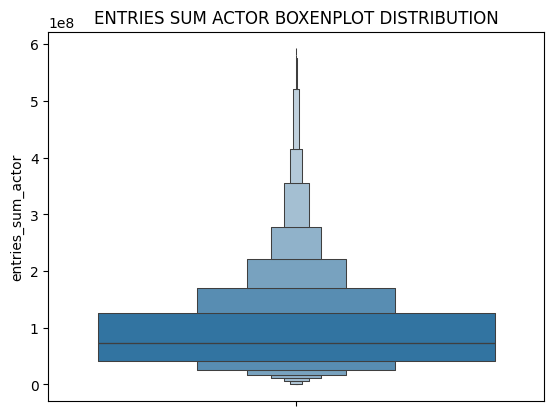

In [63]:
sns.boxenplot(dataframe['entries_sum_actor'])
plt.title("ENTRIES SUM ACTOR BOXENPLOT DISTRIBUTION")
plt.show()

#### entries_mean_director ⚠️

In [64]:
dataframe.entries_mean_director.describe()

count    3.993800e+04
mean     7.563352e+04
std      2.820623e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.289791e+06
Name: entries_mean_director, dtype: float64

In [65]:
print(f"Il y a {dataframe.entries_mean_director.isna().sum()} valeurs nulles")

Il y a 7605 valeurs nulles


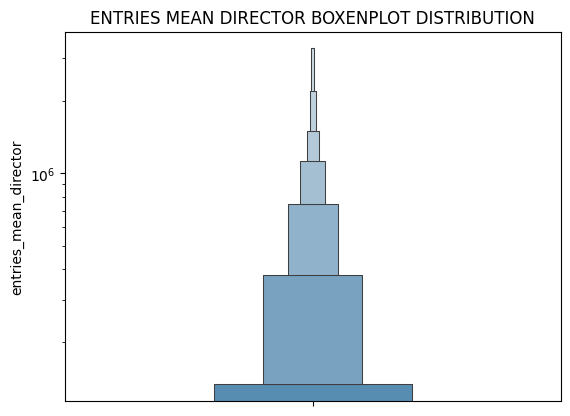

In [66]:
sns.boxenplot(dataframe.entries_mean_director)
plt.title("ENTRIES MEAN DIRECTOR BOXENPLOT DISTRIBUTION")
plt.yscale('log')
plt.show()

#### entries_sum_director ⚠️

In [67]:
dataframe.entries_sum_director.describe()

count    3.993800e+04
mean     2.340460e+06
std      8.266698e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.912719e+07
Name: entries_sum_director, dtype: float64

In [68]:
print(f"Il y a {dataframe.entries_sum_director.isna().sum()} valeurs nulles")

Il y a 7605 valeurs nulles


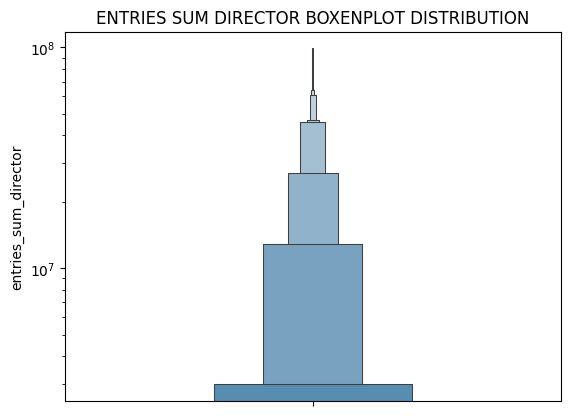

In [69]:
sns.boxenplot(dataframe.entries_sum_director)
plt.title("ENTRIES SUM DIRECTOR BOXENPLOT DISTRIBUTION")
plt.yscale('log')
plt.show()

#### entries_mean_composer ⚠️

In [70]:
dataframe.entries_mean_composer.describe()

count     39938.000000
mean        653.745305
std       20647.125025
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      652732.000000
Name: entries_mean_composer, dtype: float64

In [71]:
print(f"Il y a {dataframe.entries_mean_composer.isna().sum()} valeurs nulles")

Il y a 7605 valeurs nulles


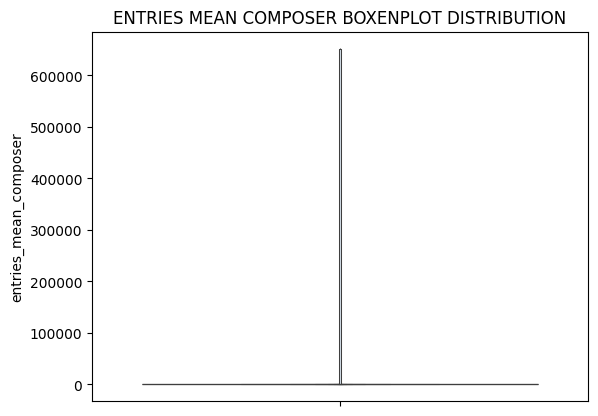

In [72]:
sns.boxenplot(dataframe.entries_mean_composer)
plt.title("ENTRIES MEAN COMPOSER BOXENPLOT DISTRIBUTION")
plt.show()

#### entries_sum_composer ⚠️

In [73]:
dataframe.entries_sum_composer.describe()

count    3.993800e+04
mean     1.059067e+05
std      3.344834e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.057426e+08
Name: entries_sum_composer, dtype: float64

In [74]:
print(f"Il y a {dataframe.entries_sum_composer.isna().sum()} valeurs nulles")

Il y a 7605 valeurs nulles


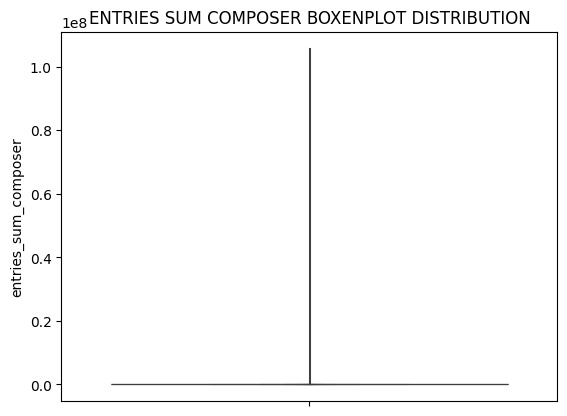

In [75]:
sns.boxenplot(dataframe.entries_sum_composer)
plt.title("ENTRIES SUM COMPOSER BOXENPLOT DISTRIBUTION")
plt.show()

#### jpbox_copies ⚠️

In [76]:
dataframe.jpbox_copies.describe()

count    39512.000000
mean       376.540621
std        190.534460
min          0.000000
25%        229.000000
50%        339.000000
75%        490.250000
max       1078.000000
Name: jpbox_copies, dtype: float64

In [77]:
print(f"Il y a {dataframe.jpbox_copies.isna().sum()} valeurs nulles")

Il y a 8031 valeurs nulles


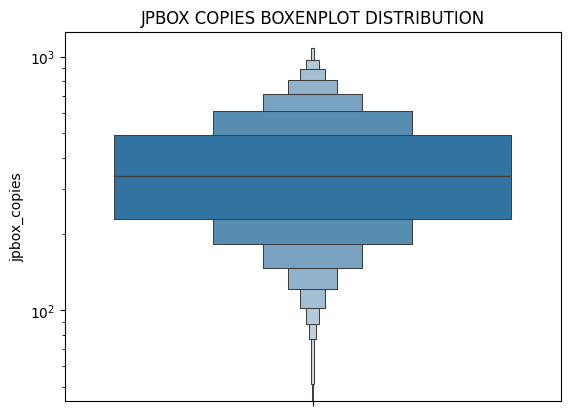

In [78]:
sns.boxenplot(dataframe.jpbox_copies)
plt.title("JPBOX COPIES BOXENPLOT DISTRIBUTION")
plt.yscale('log')
plt.show()

#### entries

In [79]:
dataframe.entries.describe()

count    4.754300e+04
mean     3.708702e+05
std      4.376221e+05
min      7.600000e+01
25%      1.245060e+05
50%      2.104830e+05
75%      4.307530e+05
max      3.906694e+06
Name: entries, dtype: float64

In [80]:
print(f"Il y a {dataframe.entries.isna().sum()} valeurs nulles")

Il y a 0 valeurs nulles


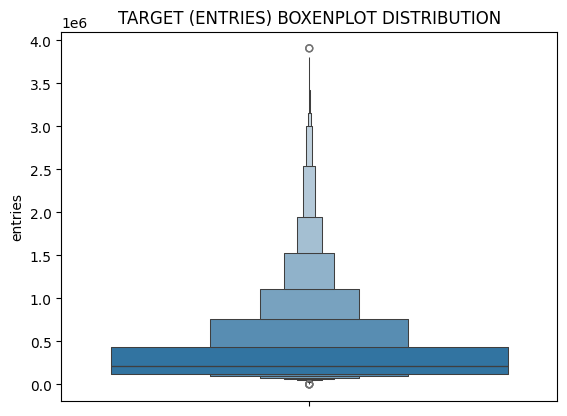

In [81]:
sns.boxenplot(dataframe.entries)
plt.title("TARGET (ENTRIES) BOXENPLOT DISTRIBUTION")
plt.show()

## Bivariate Analysis

### Correlations

In [82]:
dataframe.columns 

Index(['id_allocine', 'title', 'release_year', 'original_title', 'genres',
       'duration_m', 'synopsis', 'poster_link', 'release_date', 'societies',
       'budget', 'nationality', 'directors', 'all_director_oscars',
       'all_actor_oscars', 'actor_celebs', 'actor_celebs_by_year',
       'entries_mean_actor', 'entries_sum_actor', 'entries_mean_director',
       'entries_sum_director', 'entries_mean_composer', 'entries_sum_composer',
       'jpbox_copies', 'entries', 'genre', 'production', 'country',
       'director'],
      dtype='object')

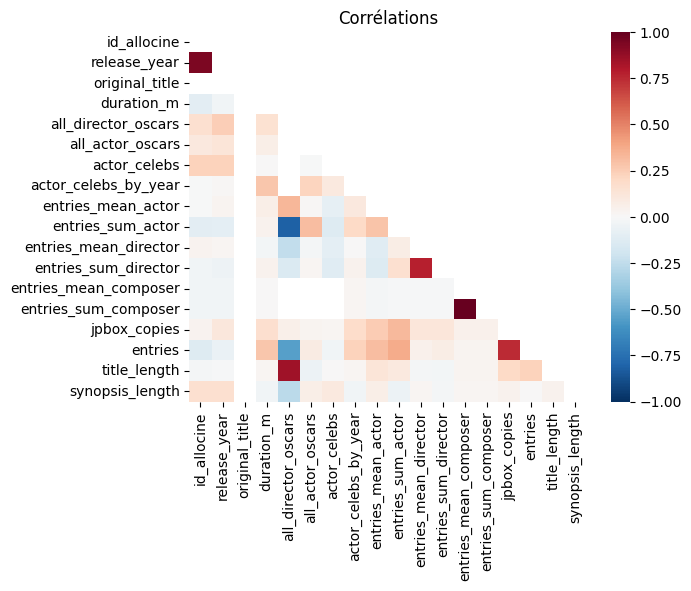

In [83]:
import numpy as np

dataframe['title_length'] = dataframe['title'].apply(lambda x: len(str(x)))
dataframe['synopsis_length'] = dataframe['synopsis'].apply(lambda x: len(str(x)))
# dataframe['release_day'] = dataframe['release_day'].apply(lambda x: int(x))
# dataframe['release_year'] = dataframe['release_year'].apply(lambda x: int(x))
dataframe['duration_m'] = dataframe['duration_m'].apply(lambda x: float(x))

corr = dataframe.select_dtypes(include='number').corr()

mask = np.zeros_like(corr)
# Set the upper triangle of the mask to True
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap="RdBu_r", vmax=1, center=0, vmin=-1)
plt.title("Corrélations")
plt.show()

### Plots

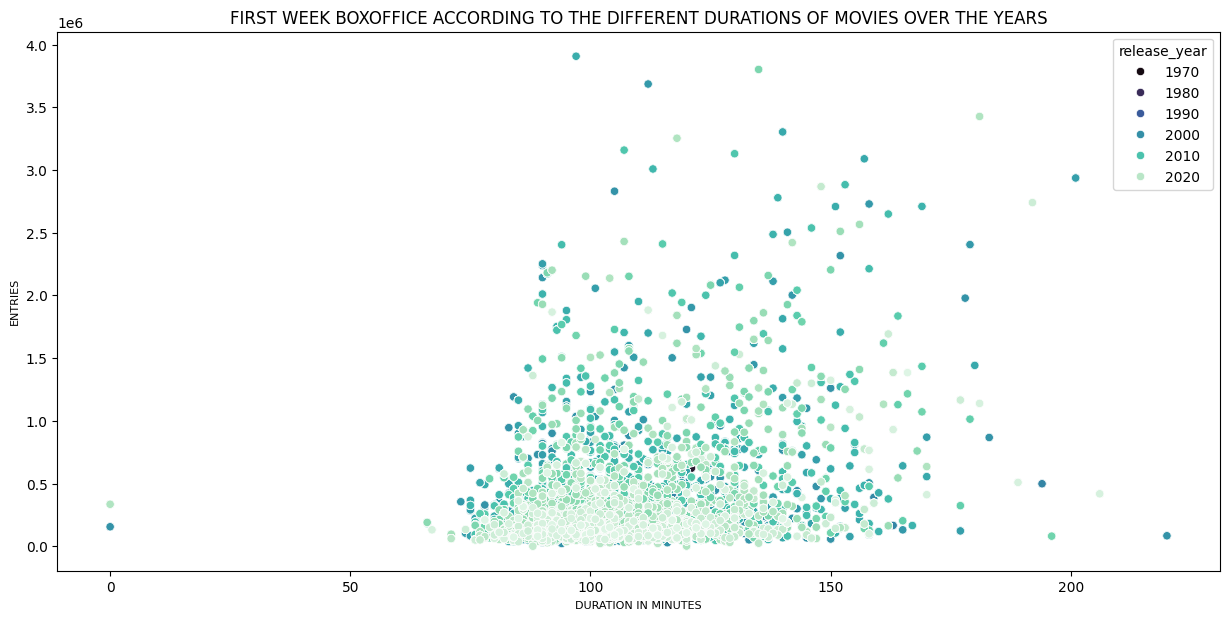

In [84]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=dataframe, x="duration_m", y="entries", hue='release_year', palette="mako")
plt.title('FIRST WEEK BOXOFFICE ACCORDING TO THE DIFFERENT DURATIONS OF MOVIES OVER THE YEARS')
plt.xlabel('DURATION IN MINUTES', fontsize=8)
plt.ylabel('ENTRIES', fontsize=8)
plt.show()

# Dataset Export for ML

In [85]:
dataframe = dataframe.drop(columns=['id_allocine', 'poster_link', 'genres', 'release_date', 'societies', 'budget', 'nationality', 'directors'])
dataframe.dtypes

title                     object
release_year               int64
original_title           float64
duration_m               float64
synopsis                  object
all_director_oscars      float64
all_actor_oscars         float64
actor_celebs             float64
actor_celebs_by_year     float64
entries_mean_actor       float64
entries_sum_actor        float64
entries_mean_director    float64
entries_sum_director     float64
entries_mean_composer    float64
entries_sum_composer     float64
jpbox_copies             float64
entries                    int64
genre                     object
production                object
country                   object
director                  object
title_length               int64
synopsis_length            int64
dtype: object

In [86]:
dataframe.to_csv('ml_data.csv')